# Initial Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./kieranFeatures_1-30_26-Sep-2024.csv")
df.head()

,ID,EDA_TonicMean_version02,EDA_TonicMean_version03,EDA_TonicMean_version04,EDA_TonicMean_version05,EDA_TonicMean_version09,EDA_TonicMean_version10,EDA_TonicMean_version11,EDA_TonicMean_version12,EDA_TonicMean_version16,...,EEG_avgRelTheta_version16,EEG_avgRelTheta_version17,EEG_avgRelTheta_version19,EEG_avgRelTheta_version20,EEG_avgRelTheta_version22,EEG_avgRelTheta_version23,adjSA1,adjSA2,adjSA3,adjSAtotal
0,5,-0.123031,-0.226077,-1.220480,-1.697738,-0.273200,-0.601171,-0.809518,-1.012558,-0.299118,...,-1.877017,-1.442056,1.070298,1.277417,0.249605,0.400156,0.119790,1.593122,-0.800726,0.350233
1,5,-0.152896,-0.050866,1.527067,1.883468,-0.378060,-0.018812,1.023216,1.189124,-0.355315,...,-1.632698,-1.531970,1.779032,1.074498,0.409991,0.333842,0.075246,-1.663383,0.859309,-0.262893
2,5,-0.166035,-0.181478,1.634437,0.904620,-0.424192,-0.452936,1.123414,0.534554,-0.380039,...,-1.489450,-1.448590,2.194570,1.262672,0.504028,0.395338,-1.072729,0.879836,-1.542415,-0.938513
3,5,-0.231095,-0.209571,1.654951,1.247081,-0.652624,-0.546311,1.214370,0.821624,-0.502463,...,-1.353433,-1.059878,2.589134,2.139926,0.593317,0.682023,-0.643181,-0.217332,0.945816,0.145041
4,5,-0.236090,-0.323013,-0.478244,-1.080788,-0.670161,-0.923364,-0.421866,-0.775114,-0.511862,...,-1.443846,-0.627980,2.326862,3.114644,0.533965,1.000560,-0.323098,0.712401,-1.473404,-0.642872


# Setting Up Outcome Variables

In [2]:
# Create binary variables for high and low 
adj_SA_1_median = np.median(df["adjSA1"])
adj_SA_2_median = np.median(df["adjSA2"])
adj_SA_3_median = np.median(df["adjSA3"])
adj_SA_tot_median = np.median(df["adjSAtotal"])

# Will be high if adjusted SA level score is equal to or above median, low otherwise
df["Lv_1_Hi"] = (df["adjSA1"] >= adj_SA_1_median).astype(int)
df["Lv_2_Hi"] = (df["adjSA2"] >= adj_SA_2_median).astype(int)
df["Lv_3_Hi"] = (df["adjSA3"] >= adj_SA_3_median).astype(int)
df["Tot_Hi"] = (df["adjSAtotal"] >= adj_SA_tot_median).astype(int)

Divide up dataframe into predictors and outcomes. Train-test-split the following data.

In [3]:
predictors_df = df.iloc[:, 1:(df.shape[1] - 8)]
outcomes_df = df.iloc[:, (df.shape[1] - 8):]

display(predictors_df)
display(outcomes_df)

predictors_train, predictors_test, outcomes_train, outcomes_test = train_test_split(predictors_df, outcomes_df, test_size = 0.2, random_state = 42)

display(predictors_train)
display(outcomes_train)

# Free up memory
del df
# del predictors_df
# del outcomes_df

,EDA_TonicMean_version02,EDA_TonicMean_version03,EDA_TonicMean_version04,EDA_TonicMean_version05,EDA_TonicMean_version09,EDA_TonicMean_version10,EDA_TonicMean_version11,EDA_TonicMean_version12,EDA_TonicMean_version16,EDA_TonicMean_version17,...,EEG_avgRelTheta_version09,EEG_avgRelTheta_version10,EEG_avgRelTheta_version11,EEG_avgRelTheta_version12,EEG_avgRelTheta_version16,EEG_avgRelTheta_version17,EEG_avgRelTheta_version19,EEG_avgRelTheta_version20,EEG_avgRelTheta_version22,EEG_avgRelTheta_version23
0,-0.123031,-0.226077,-1.220480,-1.697738,-0.273200,-0.601171,-0.809518,-1.012558,-0.299118,-0.469374,...,-2.470055,-1.633813,-1.521523,-1.189742,-1.877017,-1.442056,1.070298,1.277417,0.249605,0.400156
1,-0.152896,-0.050866,1.527067,1.883468,-0.378060,-0.018812,1.023216,1.189124,-0.355315,-0.160570,...,-1.999027,-1.796969,-0.890211,-0.846923,-1.632698,-1.531970,1.779032,1.074498,0.409991,0.333842
2,-0.166035,-0.181478,1.634437,0.904620,-0.424192,-0.452936,1.123414,0.534554,-0.380039,-0.390771,...,-1.722859,-1.645669,-0.543299,-0.588502,-1.489450,-1.448590,2.194570,1.262672,0.504028,0.395338
3,-0.231095,-0.209571,1.654951,1.247081,-0.652624,-0.546311,1.214370,0.821624,-0.502463,-0.440284,...,-1.460630,-0.940319,-0.955926,-0.744128,-1.353433,-1.059878,2.589134,2.139926,0.593317,0.682023
4,-0.236090,-0.323013,-0.478244,-1.080788,-0.670161,-0.923364,-0.421866,-0.775114,-0.511862,-0.640221,...,-1.634937,-0.156605,-0.344389,0.214848,-1.443846,-0.627980,2.326862,3.114644,0.533965,1.000560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.390463,-0.392143,-0.150550,-0.112208,-0.248912,-0.241573,-0.239724,-0.191818,-0.336535,-0.330997,...,-0.046622,-0.464843,0.523703,0.110708,0.163210,-0.308442,0.105745,-0.391989,0.798338,-0.432294
300,-0.369596,-0.380586,-0.609280,-0.487820,-0.175647,-0.203160,-0.582746,-0.450147,-0.286580,-0.305082,...,-0.102853,-0.200243,0.539456,0.390624,0.101655,-0.000704,0.021136,-0.062902,0.571962,0.092100
301,-0.457362,-0.382835,-1.247644,-0.132967,-0.483803,-0.210636,-1.131586,-0.204537,-0.496694,-0.310125,...,0.160880,-0.095837,2.240786,1.697116,0.390354,0.120724,0.417964,0.066950,1.633695,0.299016
302,-0.370669,-0.390531,-1.078873,-0.866528,-0.179415,-0.236215,-0.917973,-0.699119,-0.289149,-0.327382,...,-0.394919,-0.514674,-0.292277,-0.368327,-0.218058,-0.366396,-0.418322,-0.453964,-0.603831,-0.531050


,adjSA1,adjSA2,adjSA3,adjSAtotal,Lv_1_Hi,Lv_2_Hi,Lv_3_Hi,Tot_Hi
0,0.119790,1.593122,-0.800726,0.350233,1,1,0,1
1,0.075246,-1.663383,0.859309,-0.262893,0,0,1,0
2,-1.072729,0.879836,-1.542415,-0.938513,0,1,0,0
3,-0.643181,-0.217332,0.945816,0.145041,0,0,1,0
4,-0.323098,0.712401,-1.473404,-0.642872,0,1,0,0
...,...,...,...,...,...,...,...,...
299,0.076099,1.105227,-0.609431,0.209332,0,1,0,1
300,-0.258249,-0.360422,0.778641,0.155357,0,0,1,1
301,0.110240,0.092504,0.945232,0.627581,1,1,1,1
302,-1.105639,0.426616,0.328063,-0.108335,0,1,1,0


,EDA_TonicMean_version02,EDA_TonicMean_version03,EDA_TonicMean_version04,EDA_TonicMean_version05,EDA_TonicMean_version09,EDA_TonicMean_version10,EDA_TonicMean_version11,EDA_TonicMean_version12,EDA_TonicMean_version16,EDA_TonicMean_version17,...,EEG_avgRelTheta_version09,EEG_avgRelTheta_version10,EEG_avgRelTheta_version11,EEG_avgRelTheta_version12,EEG_avgRelTheta_version16,EEG_avgRelTheta_version17,EEG_avgRelTheta_version19,EEG_avgRelTheta_version20,EEG_avgRelTheta_version22,EEG_avgRelTheta_version23
269,-0.494618,-0.555541,-2.076390,-1.869410,0.597167,0.362062,-1.765695,-1.479098,0.418093,0.161042,...,0.462172,0.859784,-0.051114,0.233826,0.237753,0.649436,0.111443,0.465456,0.779651,0.627392
211,-0.495506,-0.500435,-0.131699,-0.129467,-0.662698,-0.644065,-0.258565,-0.237457,-0.612173,-0.596055,...,-0.260123,1.010109,-0.213657,0.601153,-0.307295,0.907735,-0.047399,1.014504,0.237016,1.841947
197,0.297909,0.310984,-1.254804,-0.683124,-0.014281,0.030278,-0.612785,-0.323310,-0.147675,-0.124319,...,-1.458536,-2.291505,-0.823308,-1.187300,-1.355405,-1.868532,-0.703187,-1.310684,-0.785986,-1.462410
75,-0.751382,-0.767114,0.220138,-0.002063,-1.119621,-1.112651,0.082926,-0.217642,-1.034901,-1.023674,...,-0.084950,-0.236394,-1.212890,-1.107865,-0.042654,-0.178245,-0.830580,-0.678148,-1.206773,-0.626839
177,-0.354384,-0.332566,-1.195093,-0.569050,-1.246429,-1.107403,-0.981167,-0.478398,-0.795857,-0.715333,...,0.509455,0.654922,0.548907,0.656188,0.507635,0.712548,-0.440298,0.200804,-0.601341,0.526651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.297054,-0.307219,-0.661230,-0.513394,-1.014946,-0.994582,-0.575531,-0.431628,-0.679828,-0.661295,...,-0.726769,-1.195044,-0.629046,-0.860808,-0.798998,-1.181357,0.012439,-0.598611,0.566104,-0.681974
71,-0.559570,-0.562361,1.381119,0.854606,-0.446144,-0.432101,1.443925,0.759285,-0.517737,-0.506605,...,0.597457,0.281063,-0.908693,-0.867127,0.619710,0.355382,0.196207,-0.034579,0.716476,0.070465
106,-0.362930,-0.376268,-0.392341,-0.370327,-0.500164,-0.518055,-0.417380,-0.369009,-0.471410,-0.478937,...,1.048729,1.497494,-0.488310,-0.037478,1.458071,2.088352,-0.736493,0.362864,-1.311561,0.741032
270,-0.663595,-0.680655,-0.323792,-0.360686,0.003870,-0.053789,-0.548041,-0.547836,-0.197162,-0.265638,...,0.846641,1.038962,0.487292,0.634474,0.559359,0.808679,0.689936,0.688303,2.265877,0.874194


,adjSA1,adjSA2,adjSA3,adjSAtotal,Lv_1_Hi,Lv_2_Hi,Lv_3_Hi,Tot_Hi
269,0.143670,1.101324,-0.822506,0.117187,1,1,0,0
211,-0.783965,-0.834554,0.116317,-0.677632,0,0,0,0
197,0.475912,-0.162414,1.180378,0.804260,1,0,1,1
75,-0.088596,0.229732,0.972713,0.618738,0,1,1,1
177,-1.146056,0.662741,-3.060939,-1.932524,0,1,0,0
...,...,...,...,...,...,...,...,...
188,1.116062,0.313836,0.270247,0.799881,1,1,1,1
71,-0.881938,0.311514,-0.739256,-0.666210,0,1,0,0
106,-0.900207,0.372292,-1.423042,-1.032613,0,1,0,0
270,-2.025591,0.753425,0.139548,-0.472791,0,1,0,0


# Discovering Correlations

Use Point Biserial Correlation

In [ ]:
def get_coors(predictors, outcomes, outcome_var):
    coors = np.array([])
    x = outcomes[outcome_var]
    for column 

### Correlations with Level 1 High SA


In [22]:
SA1_coors = np.array([])
x = outcomes_df["Lv_1_Hi"]
for column in predictors_df:
    y = predictors_df[column]
    SA1_coors = np.append(SA1_coors, stats.pointbiserialr(x, y)[0])

SA1_corrs_series = pd.Series(data = SA1_coors, index = predictors_df.columns)
SA1_corrs_series = SA1_corrs_series.sort_values(ascending = False, key = lambda x: np.abs(x))
SA1_corrs_series.head(50)

/home/jshen/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5657: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


fNIRS_S3D4_hbr_mean_version09        0.259524
fNIRS_S6D4_hbr_mean_version09        0.248932
EYE_meanline_version02              -0.230052
fNIRS_S7D5_hbr_mean_version09        0.225756
fNIRS_S1D1_hbr_mean_version10        0.225447
fNIRS_S7D5_hbr_slope_version02       0.224202
fNIRS_S4D5_hbr_RMS_version03        -0.217083
fNIRS_S4D5_hbr_var_version03        -0.214469
fNIRS_S4D5_hbr_MaxAmp_version03     -0.213761
EYE_det_version03                   -0.212822
fNIRS_S4D5_hbr_MaxAmp_version02     -0.209365
fNIRS_S4D5_hbr_var_version02        -0.208932
fNIRS_S1D1_hbr_mean_version02        0.208749
fNIRS_S4D5_hbr_RMS_version02        -0.208439
fNIRS_S4D5_hbo_MaxAmp_version03     -0.207962
fNIRS_S2D1_hbr_mean_version10        0.207330
fNIRS_S4D5_hbo_RMS_version02        -0.206484
fNIRS_S6D4_hbr_skew_version03       -0.206203
EYE_det_version02                   -0.206132
fNIRS_S4D5_hbo_RMS_version03        -0.205783
fNIRS_S1D1_hbr_mean_version09        0.204328
fNIRS_S4D5_hbo_MaxAmp_version02   

### Correlations with Level 2 SA High

In [23]:
# Get array of point biserial correlations
SA2_coors = np.array([])
x = outcomes_df["Lv_2_Hi"]
for column in predictors_df:
    y = predictors_df[column]
    SA2_coors = np.append(SA2_coors, stats.pointbiserialr(x, y)[0])

# Map features to correlations
SA2_corrs_series = pd.Series(data = SA2_coors, index = predictors_df.columns)
SA2_corrs_series = SA2_corrs_series.sort_values(ascending = False, key = lambda x: np.abs(x))
SA2_corrs_series.head(50)

fNIRS_S1D2_hbo_RMS_version09         -0.194613
EDA_PhasicMin_version23              -0.190724
fNIRS_S1D1_hbr_area_version05        -0.184949
fNIRS_S4D5_hbo_RMS_version09         -0.183523
fNIRS_S4D5_hbo_RMS_version16         -0.179908
fNIRS_S4D5_hbo_RMS_version17         -0.179320
fNIRS_S3D3_hbo_mean_version03        -0.176381
EYE_det_version10                    -0.176294
fNIRS_S4D2_hbr_mean_version04         0.176009
fNIRS_S5D3_hbo_MaxAmp_version17      -0.174589
fNIRS_S5D3_hbo_MaxAmp_version10      -0.173018
fNIRS_S1D2_hbo_area_version10        -0.172941
fNIRS_S8D7_hbo_RMS_version23         -0.172309
EYE_AvgPupilDiam_version12           -0.172236
fNIRS_S4D2_hbr_mean_version09         0.170941
fNIRS_S2D1_hbo_area_version05        -0.170657
fNIRS_S6D7_hbr_slope_version02        0.169484
fNIRS_S6D7_hbr_skew_version04         0.165854
fNIRS_S6D6_hbr_slope_version23       -0.164438
fNIRS_S1D2_hbo_var_version09         -0.164278
fNIRS_S4D4_hbo_RMS_version09         -0.162949
EYE_corm_vers

### Correlations with Level 3 SA High


In [24]:
SA3_coors = np.array([])
x = outcomes_df["Lv_3_Hi"]
for column in predictors_df:
    y = predictors_df[column]
    SA3_coors = np.append(SA3_coors, stats.pointbiserialr(x, y)[0])

SA3_corrs_series = pd.Series(data = SA3_coors, index = predictors_df.columns)
SA3_corrs_series = SA3_corrs_series.sort_values(ascending = False, key = lambda x: np.abs(x))
SA3_corrs_series.head(50)

fNIRS_S7D5_hbr_slope_version09        0.267208
fNIRS_S6D7_hbr_skew_version10         0.244622
fNIRS_S7D5_hbr_slope_version02        0.242424
EEG_avgRelAlpha_version16            -0.240167
fNIRS_S4D5_hbr_MaxAmp_version02      -0.239346
fNIRS_S7D5_hbr_slope_version10        0.236189
fNIRS_S4D5_hbr_RMS_version02         -0.235369
EEG_avgRelParAlpha_version16         -0.234341
fNIRS_S7D5_hbr_MaxAmp_version02      -0.234271
fNIRS_S4D5_hbr_RMS_version03         -0.233104
EEG_avgRelMedAlpha_version16         -0.233081
fNIRS_S7D5_hbr_MaxAmp_version03      -0.231953
fNIRS_S5D6_hbr_RMS_version16         -0.230836
fNIRS_S4D5_hbo_RMS_version02         -0.230458
fNIRS_S4D5_hbr_MaxAmp_version03      -0.229220
fNIRS_S4D5_hbr_var_version02         -0.228163
fNIRS_S6D7_hbo_slope_version16       -0.227969
fNIRS_S4D5_hbo_MaxAmp_version02      -0.223793
EEG_avgRelOccAlpha_version16         -0.223479
EEG_avgRelFroDelta_version09          0.222471
EEG_avgRelFroDelta_version16          0.222341
EEG_avgRelDel

### Correlations with Total SA High

In [25]:
SA_tot_coors = np.array([])
x = outcomes_df["Tot_Hi"]
for column in predictors_df:
    y = predictors_df[column]
    SA_tot_coors = np.append(SA_tot_coors, stats.pointbiserialr(x, y)[0])

SA_tot_corrs_series = pd.Series(data = SA_tot_coors, index = predictors_df.columns)
SA_tot_corrs_series = SA_tot_corrs_series.sort_values(ascending = False, key = lambda x: np.abs(x))
SA_tot_corrs_series.head(50)

EEG_avgRelFroAlpha_version16      -0.283605
fNIRS_S5D6_hbr_RMS_version17      -0.267804
fNIRS_S7D5_hbr_slope_version02     0.267341
fNIRS_S4D5_hbr_RMS_version03      -0.264881
fNIRS_S4D5_hbr_MaxAmp_version02   -0.263713
fNIRS_S4D5_hbr_RMS_version02      -0.263675
fNIRS_S4D5_hbr_MaxAmp_version03   -0.258945
EEG_avgRelOccAlpha_version03       0.254052
fNIRS_S4D5_hbr_var_version02      -0.250935
EEG_avgRelAlpha_version16         -0.249727
EEG_avgRelMedAlpha_version03       0.248657
fNIRS_S4D5_hbo_RMS_version02      -0.248485
EEG_avgRelOccAlpha_version02       0.247489
fNIRS_S6D4_hbr_mean_version09      0.246073
EEG_avgRelParAlpha_version02       0.246072
fNIRS_S7D5_hbr_MaxAmp_version03   -0.245727
fNIRS_S4D5_hbo_RMS_version03      -0.245000
EEG_avgRelAlpha_version11         -0.244357
EEG_avgRelParAlpha_version03       0.243798
fNIRS_S4D5_hbr_slope_version03     0.243046
EEG_avgRelFroAlpha_version09      -0.242836
fNIRS_S4D5_hbo_MaxAmp_version02   -0.241826
fNIRS_S4D5_hbr_var_version03    

Outcome of the cell below is that parameters of elasticnet regularization, regularization strength of 1.0, and l1_ratio of 0.25 is best currently.

In [15]:
# Initialize the model
SA1_model = LogisticRegression(solver = "saga", max_iter = 5000)

params = {
    "C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    "penalty": ["l1", "elasticnet"],
    "l1_ratio": [.25, .50, .75]
}

# Perform 5-fold cross-validation with different regularization strengths and regularization types
clf = GridSearchCV(SA1_model, params, cv = 5, scoring = "f1", n_jobs = -1)
clf.fit(predictors_train, outcomes_train["Lv_1_Hi"])

# Show the best regularization strength and penaalty type
print("Best regularization strength:", clf.best_params_["C"])
print("Best penalty:", clf.best_params_["penalty"])

if clf.best_params_["penalty"] == "elasticnet":
    print("Best alpha:", clf.best_params_["l1_ratio"])

/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/jshen/.lo

Best regularization strength: 1.0
Best penalty: elasticnet
Best alpha: 0.25


Elasticnet penalty slightly better than l1

In [18]:
from sklearn.model_selection import cross_val_score

SA1_model_l1 = LogisticRegression(penalty = "l1", C = 10.0, solver = "saga", max_iter = 10000)
SA1_model_elasticnet = LogisticRegression(l1_ratio = 0.25, max_iter = 10000, penalty = "elasticnet", solver = "saga", C = 1.0)

# Perform 10-fold cross-validation
cv_scores_l1 = cross_val_score(SA1_model_l1, predictors_train, outcomes_train["Lv_1_Hi"], cv = 10, scoring = "f1", n_jobs = -1)
cv_scores_elasticnet = cross_val_score(SA1_model_elasticnet, predictors_train, outcomes_train["Lv_1_Hi"], cv = 10, scoring = "f1", n_jobs = -1)

# Calculate the average cross-validation score
mean_cv_score_l1 = cv_scores_l1.mean()
mean_cv_score_elasticnet = cv_scores_elasticnet.mean()

print("Average 10-fold cross-validation score for l1:", mean_cv_score_l1)
print("Average 10-fold cross-validation score for elasticnet:", mean_cv_score_elasticnet)

Average 10-fold cross-validation score for l1: 0.685989010989011
Average 10-fold cross-validation score for elasticnet: 0.6910648192387322


In [9]:
from sklearn.model_selection import cross_val_score

SA1_model = LogisticRegression(l1_ratio = 0.25, max_iter = 20000, penalty = "elasticnet", solver = "saga", C = 1.0, n_jobs = -1)
cv_scores = cross_val_score(SA1_model, predictors_train, outcomes_train["Lv_1_Hi"], cv = 10, scoring = "f1", n_jobs = -1)
mean_cv_score = cv_scores.mean()
print("Average 10-fold cross-validation score:", mean_cv_score)

Average 10-fold cross-validation score: 0.6910648192387322


### Actual SA1 Model Training

In [4]:
SA1_model = LogisticRegression(l1_ratio = 0.25, max_iter = 20000, penalty = "elasticnet", solver = "saga", C = 1.0, n_jobs = -1)
SA1_model.fit(predictors_train, outcomes_train["Lv_1_Hi"])
SA1_model

LogisticRegression(l1_ratio=0.25, max_iter=20000, n_jobs=-1,
                   penalty='elasticnet', solver='saga')

In [16]:
np.array(SA1_model.coef_ != 0).sum()

np.int64(2807)

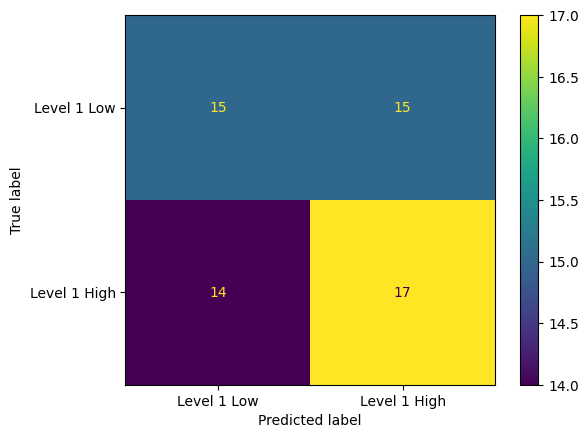

In [12]:
from sklearn import metrics

SA1_predicted_outcomes = SA1_model.predict(predictors_test)
SA1_cm = metrics.confusion_matrix(outcomes_test["Lv_1_Hi"], SA1_predicted_outcomes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = SA1_cm, display_labels = ["Level 1 Low", "Level 1 High"])
cm_display.plot()
plt.show()

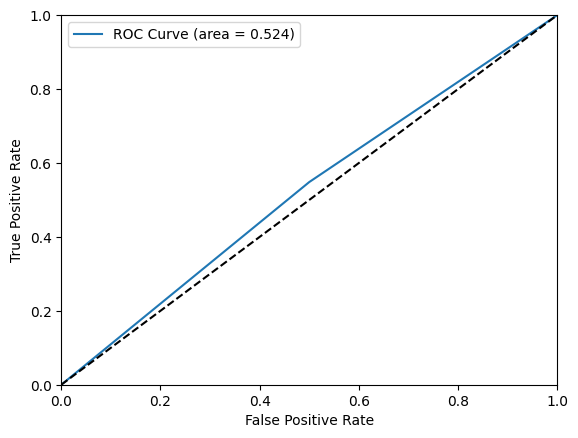

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(outcomes_test["Lv_1_Hi"], SA1_predicted_outcomes)
roc_auc  = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label = "ROC Curve (area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--") # Random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

## Testing Model Regularization with Made-Up Function

In [19]:
import random

def func_val_bin(predictors):
    """
        Creates a function out of five variables in the predictors dataframe
        and outputs a boolean Pandas series where True means the function value
        was greater than or equal to the median and False otherwise.

        Parameters:
            predictors (Dataframe): pandas Dataframe containing all predictor features

        Output:
            (Series): pandas Series containing True and False values where True means that
                      the calculated value was above the median and False otherwise
    """

    # Initialize arary to store continuous values of function
    func_calcs = np.array([])

    # Get random coefficients and features
    random.seed(42)
    coefficients = np.array([round(random.uniform(-5, 5), 1) for i in range(5)])
    selected_features = np.array(random.sample(list(predictors.columns), 5))

    print("Function = " + 
            f"{coefficients[0]} * {selected_features[0]} + " +
            f"{coefficients[1]} * {selected_features[1]} + " +
            f"{coefficients[2]} * {selected_features[2]} + " +
            f"{coefficients[3]} * {selected_features[3]} + " +
            f"{coefficients[4]} * {selected_features[4]}")
    
    for index, row in predictors.iterrows():
        # Add new calculation to func_calcs
        func_calcs = np.append(func_calcs, (coefficients[0] * row[selected_features[0]] +
                                              coefficients[1] * row[selected_features[1]] +
                                              coefficients[2] * row[selected_features[2]] +
                                              coefficients[3] * row[selected_features[3]] +
                                              coefficients[4] * row[selected_features[4]]))

    func_calcs_median = np.median(func_calcs)
    return func_calcs >= func_calcs_median

In [5]:
# Initialize the model
SA1_model_func = LogisticRegression(solver = "saga", max_iter = 5000)

params = {
    "C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    "penalty": ["l1", "l2", "elasticnet"],
    "l1_ratio": [.25, .50, .75]
}

# Perform 5-fold cross-validation with different regularization strengths and regularization types
clf = GridSearchCV(SA1_model_func, params, cv = 5, scoring = "f1", n_jobs = -1)
clf.fit(predictors_train, outcomes_train_func["Lv_1_Hi"])

# Show the best regularization strength and penaalty type
print("Best regularization strength:", clf.best_params_["C"])
print("Best penalty:", clf.best_params_["penalty"])

if clf.best_params_["penalty"] == "elasticnet":
    print("Best alpha:", clf.best_params_["l1_ratio"])

/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/jshen/.lo

Best regularization strength: 0.1
Best penalty: l1


In [63]:
SA1_model_func = LogisticRegression(max_iter = 20000, penalty = "l1", solver = "saga", C = 0.1, n_jobs = -1)
SA1_model_func.fit(predictors_train, outcomes_train_func["Lv_1_Hi"])
SA1_model_func

LogisticRegression(C=0.1, max_iter=20000, n_jobs=-1, penalty='l1',
                   solver='saga')

In [67]:
SA1_model_func_coef = pd.DataFrame(
    data = {
        "coefficients": SA1_model_func.coef_[0]
    },
    index = np.array(list(predictors_test.columns))
)

SA1_model_func_coef.loc[["EDA_TonicMean_version23", "EEG_avgRelOccAlpha_version23", "fNIRS_S1D1_hbo_slope_version23", "fNIRS_S2D1_hbr_kurtosis_version23", "EYE_FixationDuration_version23"], :]

,coefficients
EDA_TonicMean_version23,0.001721
EEG_avgRelOccAlpha_version23,0.203009
fNIRS_S1D1_hbo_slope_version23,0.588721
fNIRS_S2D1_hbr_kurtosis_version23,0.736985
EYE_FixationDuration_version23,0.691237


The results above show that the coefficients above where nowhere near their actual values. Slightly suspicious of the effectiveness of regularization, but reduced a good amount of the features without removing any of the actual features used.

#